In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix



In [ ]:
df = pd.read_csv('TipJoke.csv')
df


,Tip,Ad,Joke,None
0,1,0,0,1
1,1,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,1
...,...,...,...,...
206,0,1,0,0
207,0,0,1,0
208,0,1,0,0
209,0,0,1,0


In [ ]:

X = df.drop(columns='Tip')
y = df['Tip']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))


0.71875
[[46  0]
 [18  0]]


In [ ]:
import graphviz
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=('Ad','Joke','None'),
                                class_names=('0','1'),
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('TipJoke_dt',view=True)

'TipJoke_dt.png'

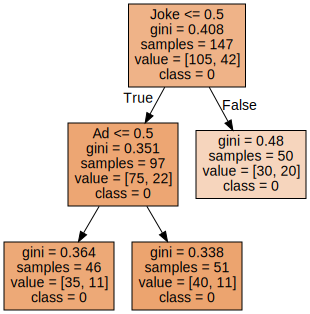

In [ ]:
with open("TipJoke_dt") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_1 >  0.50
|   |--- class: 0

